<a href="https://colab.research.google.com/github/MSClaus/Olimpiadas_Analise/blob/main/Jogos_Olimpicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXPLORAÇÃO DE DADOS SOBRE A HISTÓRIA RECENTE DOS JOGOS OLÍMPICOS** 
#####**Autor:** Matheus Souza Claus
#####**Origem da base de dados:** [Kaggle: 120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# **1. INTRODUÇÃO**
Neste projeto explorei um conjunto de dados sobre os Jogos Olímpicos modernos, incluindo todos os jogos de Atenas (1896) ao Rio (2016).

### Motivação:
O maior evento esportivo do planeta, os Jogos Olimpicos da Era Moderna, tiveram sua primeira edição em Atenas no ano de 1896 e é até o presente momento, sem sombra de duvidas, o maior sonho dos atletas de alta performance. 
Por ter como hobbie o esporte e por já ter participado de inúmeras competições esportivas de diferentes modalidades, decidi fazer algumas análises para entender algumas caracteristicas desse seleto grupo de atletas que participarão dos jogos olímpicos.

### Sobre a Base:
* O arquivo atleta_events.csv contém 271.116 linhas e 15 colunas, ou seja, 271.116 atletas.
<br>
<br>
* Cada linha correponde à um atleta competindo em uma modalidade olímpica diferente (portanto os atletas podem estar duplicados caso tenham participado de mais de uma modalidade ou caso tenham participado de mais de uma edição das Olímpiadas). 
<br>
<br>
* Existem 15 atributos para cada atleta-evento (como irei chamar cada linha do banco de dados). Sendo eles:
 * ID - Unique number for each athlete
 * Name - Athlete's name
 * Sex - M or F
 * Age - Integer
 * Height - In centimeters
 * Weight - In kilograms
 * Team - Team name
 * NOC - National Olympic Committee 3-letter code
 * Games - Year and season
 * Year - Integer
 * Season - Summer or Winter
 * City - Host city
 * Sport - Sport
 * Event - Event
 * Medal - Gold, Silver, Bronze, or NA

#**2. IMPORTANDO MÓDULOS**


In [81]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

# **3. IMPORTANDO ARQUIVOS CSV**

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
from google.colab import files 

dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/athlete_events.csv')
regioes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/noc_regions.csv')

# **4. REVISÃO DE DADOS**


 ### - Revisão da disposição dos dados.
  - head | info | describe


In [84]:
dados.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [85]:
dados.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [86]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [87]:
regioes.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


#**5. JUNTAR ARQUIVOS** 

- Vamos juntar os arquivos utilizando como conexão a coluna NOC (iniciais paises).

- Usaremos a função "Merge" da biblioteca Pandas


In [88]:
tabelaAgrupada = pd.merge(dados, regioes, on='NOC', how='left')

In [89]:
tabelaAgrupada.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


# **6. OLÍMPIADAS DE VERÃO**

"A etapa moderna dos Jogos Olímpicos (ou seja, sua retomada, ocorrida desde 1896, na cidade de Atenas), se refere a um dos dois tipos existentes dessa competição. Os Jogos Olímpicos que costumamos acompanhar e para os quais enviamos atletas são, na verdade, os Jogos Olímpicos de Verão (embora ocorram no mês de julho, estação do inverno para os países do hemisfério sul). Há também os Jogos Olímpicos de Inverno, cuja participação brasileira ainda é bastante restrita, e cuja transmissão televisiva ocorreu apenas no ano de 2010, pela rede Record."

RONDINELLI, Paula. "Como são Escolhidas as Cidades-Sede dos Jogos Olímpicos?"; Brasil Escola. Disponível em: https://brasilescola.uol.com.br/educacao-fisica/como-escolhida-cidadesede-dos-jogos-olimpicos.htm. Acesso em 09 de maio de 2022.

Nosso dataset é composto por dados das olímpiadas de verão e inverno.
<br>
Para a intenção das análises aqui dispostas vamos utilizar apenas as versões de verão.
<br>
Portanto será necessário filtrar tais informações. 

In [90]:
olimpiadasVerao = tabelaAgrupada[(tabelaAgrupada.Season == 'Summer')]
olimpiadasVerao.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


# **7. MARATONA**

Por ter como hobbie a corrida e por já ter participado de Maratonas,  decidi fazer algumas análises para entender as caracteristicas que os campeões olímpicos dessa modalidade esportiva apresentam.

## ***7.1 Caracteristicas dos atletas campeões olimpicos da maratona do gênero masculino.***


Vamos iniciar criando um dataframe, dividindo a população do nosso conjunto de dados pelos atletas campeões olimpicos do sexo masculino praticantes da modalidade esportiva maratona.

In [91]:
maratonaMasculino = olimpiadasVerao[(olimpiadasVerao.Sex == 'M') & (olimpiadasVerao.Event == "Athletics Men's Marathon") & (olimpiadasVerao.Medal == 'Gold')]

In [92]:
maratonaMasculino.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
720,411,Gezahgne Abera,M,22.0,166.0,58.0,Ethiopia,ETH,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Marathon,Gold,Ethiopia,NaN
13302,7219,Stefano Baldini,M,33.0,176.0,62.0,Italy,ITA,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's Marathon,Gold,Italy,NaN
21706,11467,Abebe Bikila,M,28.0,177.0,57.0,Ethiopia,ETH,1960 Summer,1960,Summer,Roma,Athletics,Athletics Men's Marathon,Gold,Ethiopia,NaN
21707,11467,Abebe Bikila,M,32.0,177.0,57.0,Ethiopia,ETH,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Men's Marathon,Gold,Ethiopia,NaN
25706,13428,Gelindo Bordin,M,29.0,180.0,68.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Marathon,Gold,Italy,NaN


### *7.1.1 Distribuição de medalhas de ouro/características*

- Distribuição de medalhas de ouro/idade
- Distribuição de medalhas de ouro/altura
- Distribuição de medalhas de ouro/peso
- Distribuição de medalhas de ouro/país


- Para fazer esse tipo de análise é necessário verificar se existem valores nulos nas colunas: 
    - idade (Age)
    - altura (Height)
    - peso (Weight)
    - país (region)

- Havendo valores nulos deverão ser eliminados do grupo.

In [93]:
maratonaMasculino.isnull().any()

ID        False
Name      False
Sex       False
Age       False
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region    False
notes      True
dtype: bool

In [94]:
maratonaMasculino = maratonaMasculino[np.isfinite(maratonaMasculino['Height'])]

In [95]:
maratonaMasculino = maratonaMasculino[np.isfinite(maratonaMasculino['Weight'])]

####7.1.1.1. Distribuição de medalhas de ouro/idade

Vamos plotar um gráfico considerando a idade (anos) e e quantidade de medalhas de ouro obtidas.

Text(0.5, 1.0, 'Distribuição de Medalhas de Ouro')

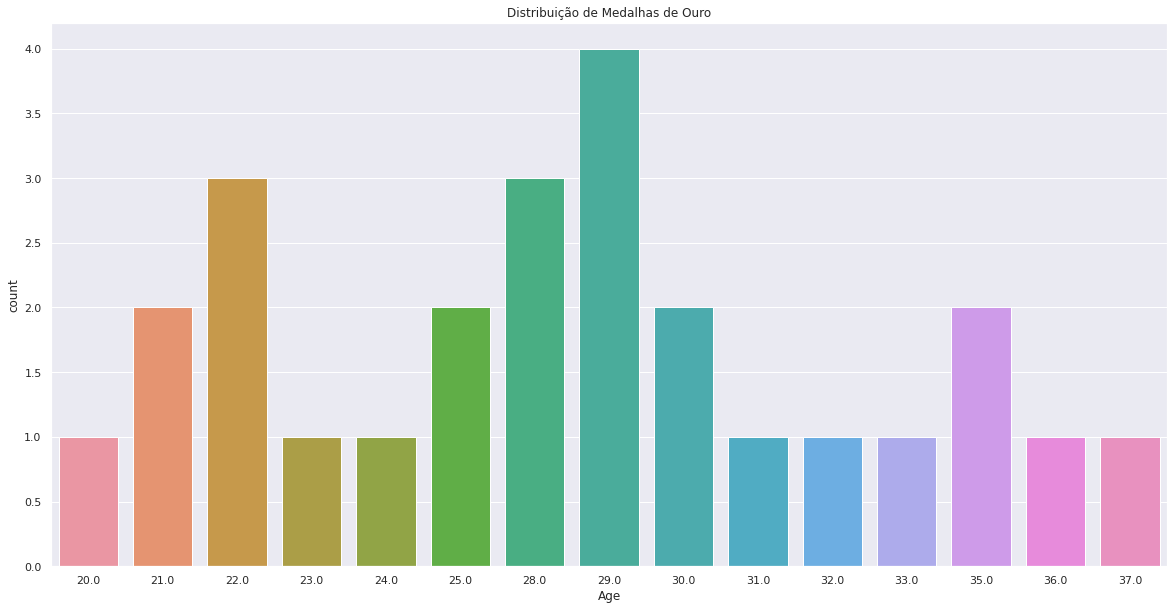

In [96]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(x=maratonaMasculino['Age'])
plt.title('Distribuição de Medalhas de Ouro')

####7.1.1.2. Distribuição de medalhas de ouro/altura

Plotagem de gráfico com distribuição das medalhas de ouro por altura (cm) do atleta campeão da ocasião.

Text(0.5, 1.0, 'Distribuição de Medalhas de Ouro')

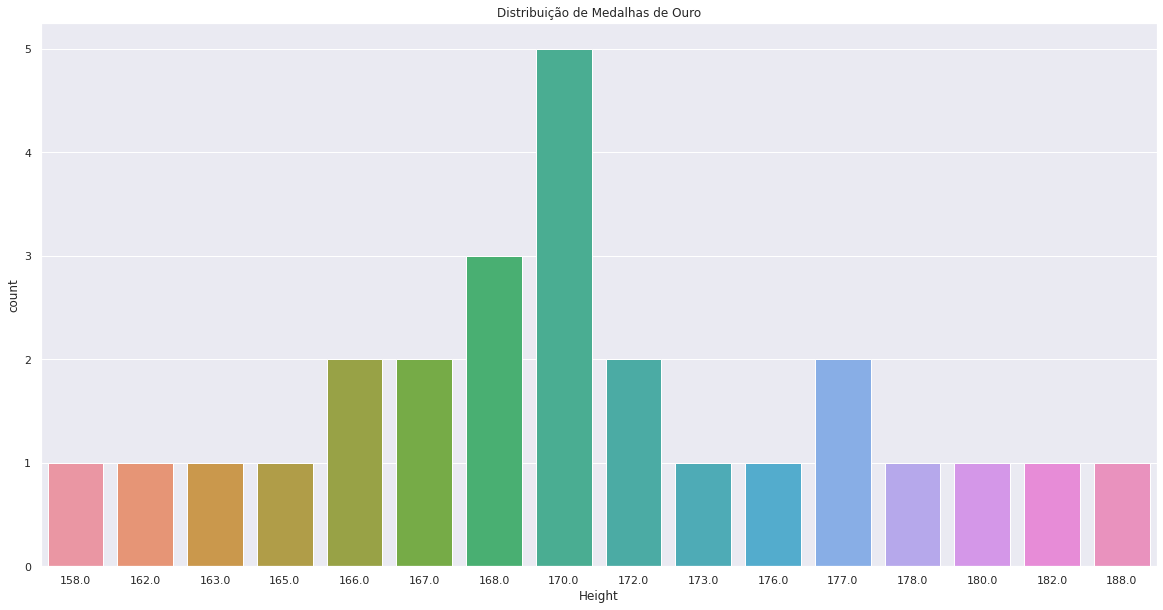

In [120]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(x=maratonaMasculino['Height'])
plt.title('Distribuição de Medalhas de Ouro')

####7.1.1.3. Distribuição de medalhas de ouro/peso

Impressão de gráfico contendo no eixo x  o peso (kg) dos atletas e no eixo y a quantidade de medalhas de ouro obtidas.

Text(0.5, 1.0, 'Distribuição de Medalhas de Ouro por Peso (kg)')

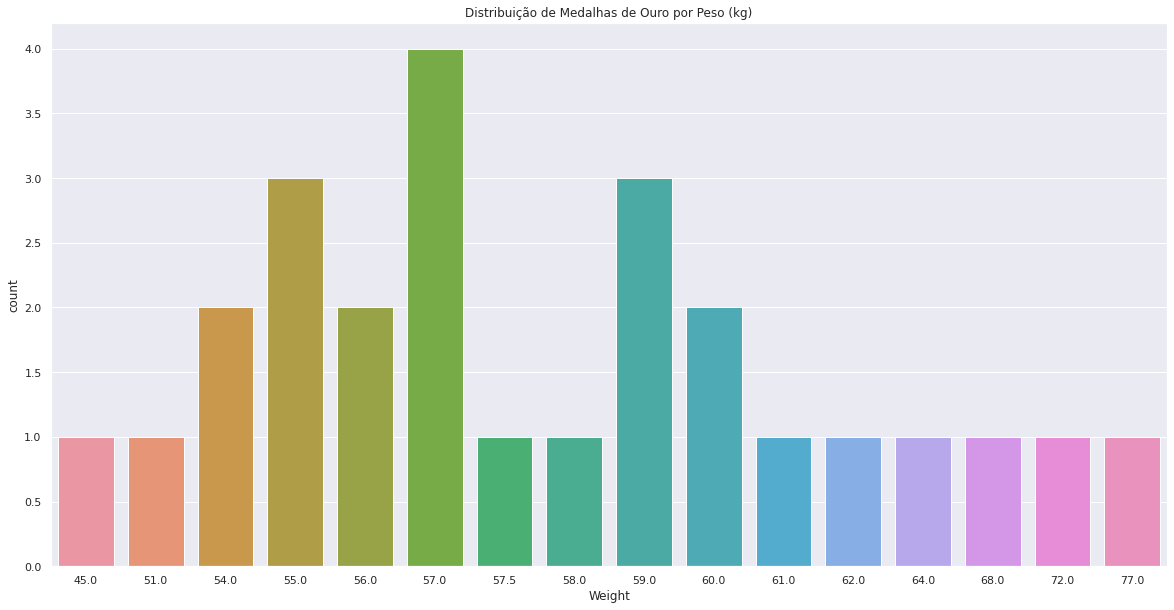

In [119]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(x=maratonaMasculino['Weight'])
plt.title('Distribuição de Medalhas de Ouro por Peso (kg)')


Usando os mesmos dados, podemos plotar a mudança de peso ao longo do tempo usando um gráfico de pontos (com paleta colorida).

Text(0.5, 1.0, 'Variação do Peso (kg) de Atletas Maratonistas Masculinos ao Longo do Tempo')

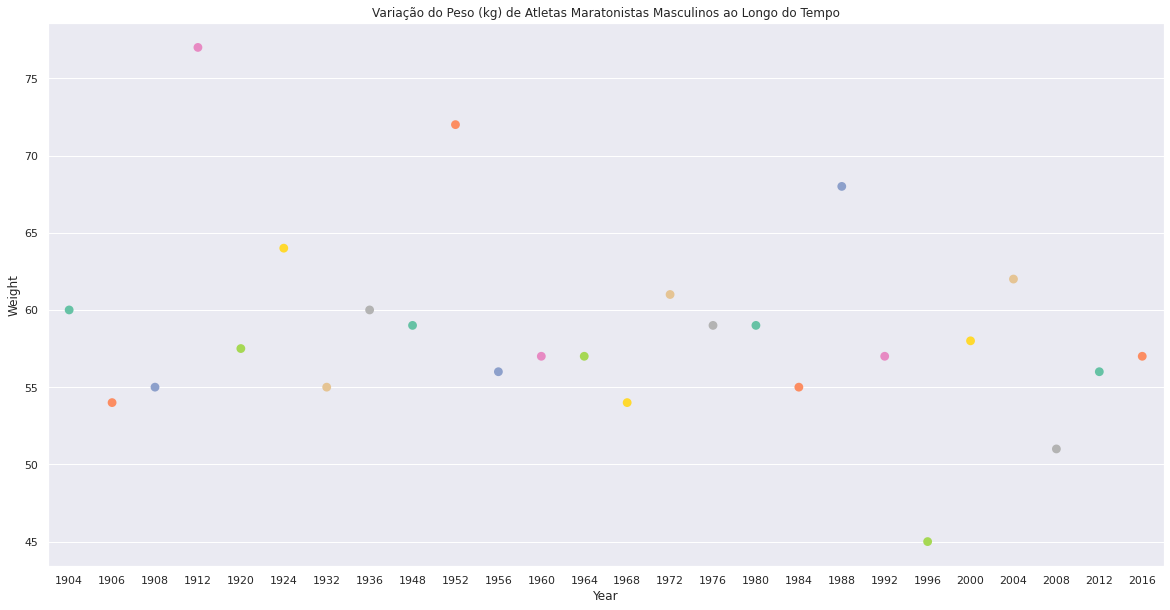

In [121]:
plt.figure(figsize=(20, 10))
sns.pointplot(x='Year', y='Weight', data=maratonaMasculino, palette='Set2')
plt.title('Variação do Peso (kg) de Atletas Maratonistas Masculinos ao Longo do Tempo')

####7.1.1.4. Distribuição de medalhas de ouro/país

Vamos agora analisar os 5 principais países medalhistas de ouro na modalidade


In [100]:
maratonaMasculino.region.value_counts().reset_index(name='Medalhas').head(5)

,index,Medalhas
0,Ethiopia,4
1,USA,3
2,Italy,2
3,Argentina,2
4,Germany,2


Agora vamos plotar em um gráfico

Text(0.5, 1.0, 'Medalhas por Países')

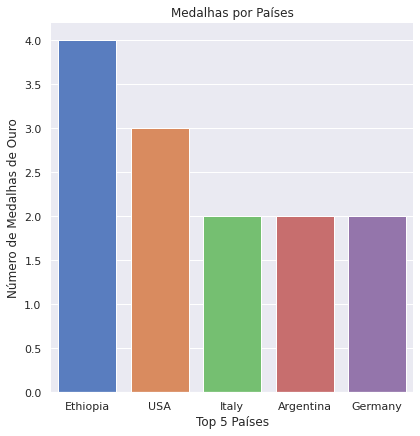

In [122]:
maratonaMasculinoPais = maratonaMasculino.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=maratonaMasculinoPais,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 Países")
g.set_ylabels("Número de Medalhas de Ouro")
plt.title('Medalhas por Países')

Agora vamos analisar os quatro campões da Ethiopia e a edição dos jogos de suas conquistas.

In [102]:
medalhistasETH = maratonaMasculino.loc[maratonaMasculino['NOC'] == 'ETH']


In [103]:
grupoETH = medalhistasETH.groupby(['Year']).first()


In [104]:
grupoETH.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,region,notes
Year,,,,,,,,,,,,,,,,
1960,11467,Abebe Bikila,M,28.0,177.0,57.0,Ethiopia,ETH,1960 Summer,Summer,Roma,Athletics,Athletics Men's Marathon,Gold,Ethiopia,None
1964,11467,Abebe Bikila,M,32.0,177.0,57.0,Ethiopia,ETH,1964 Summer,Summer,Tokyo,Athletics,Athletics Men's Marathon,Gold,Ethiopia,None
1968,131283,Mamo Wolde,M,36.0,170.0,54.0,Ethiopia,ETH,1968 Summer,Summer,Mexico City,Athletics,Athletics Men's Marathon,Gold,Ethiopia,None
2000,411,Gezahgne Abera,M,22.0,166.0,58.0,Ethiopia,ETH,2000 Summer,Summer,Sydney,Athletics,Athletics Men's Marathon,Gold,Ethiopia,None


Podemos observar que o berço dos campeões é a Etiópia com quatro conquistas com destaque para o atleta Abebe Bikila com duas conquitas olimpicas.

####7.1.1.5. Análise estatistica dos campeões

Vamos criar um gráfico de dispersão usando os pares de dados peso e altura dos atletas. O intuito é tentar determinar se existe uma relação ou associação entre essas duas variáveis. 

Text(0.5, 1.0, 'Altura x Peso dos Medalhistas Olímpicos')

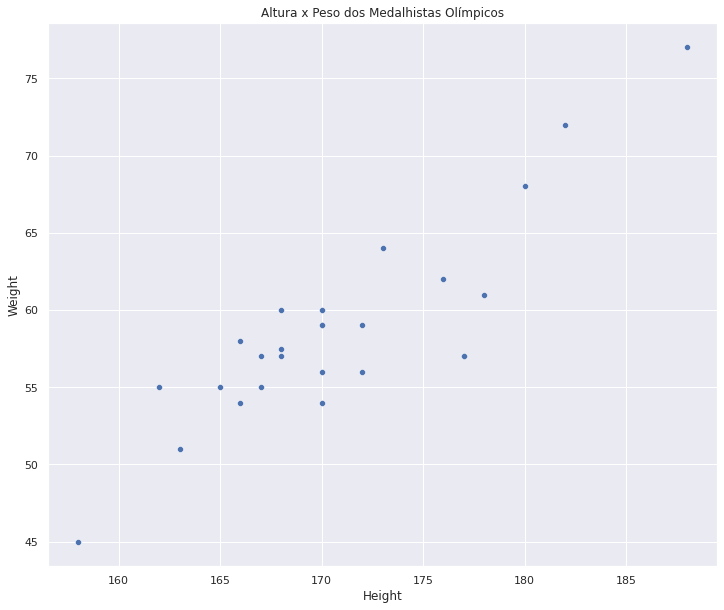

In [105]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=maratonaMasculino)
plt.title('Altura x Peso dos Medalhistas Olímpicos')

É possível observar que grande maioria das amostras mostra uma relação linear entre altura e peso (quanto mais peso, mais altura).

Vamos utilizar a função describe para observar estatísticas descritivas dos campeões olimpicos.



In [106]:
maratonaMasculino.describe()

,ID,Age,Height,Weight,Year
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,67625.653846,27.846154,170.884615,58.673077,1962.230769
std,45964.992763,5.033427,6.653281,6.344986,35.581240
min,411.000000,20.000000,158.000000,45.000000,1904.000000
25%,21550.000000,23.250000,167.000000,55.250000,1933.000000
50%,61389.000000,28.500000,170.000000,57.250000,1966.000000
75%,112299.500000,30.750000,175.250000,60.000000,1991.000000
max,134080.000000,37.000000,188.000000,77.000000,2016.000000


De forma simplória é possível concluir que os expoentes dessa modalidade, utilizando como método uma análise em cima de uma média simples, possuem:
- Idade: ~ 28 anos
- Altura: ~ 1,71 metros
- Peso: ~ 59 kg


# **8. BRASIL OLÍMPICO**

Como curioso, esportista e bom brasileiro,
<br>
- Fiz a análise da quantitade de participantes brasileiros em olimpiadas ao longo dos anos e;
- E a quantidade de campeões olimpicos ao longo dos anos;




##*8.1. Atletas Olímpicos Brasileiros*




Vamos filtrar no nosso dataset os atletas brasileiros participantes das olimpiadas ao longo dos anos.

In [107]:
brasilOlimpico = olimpiadasVerao.loc[olimpiadasVerao['region'] == 'Brazil']
brasilOlimpico.head(5)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,Brazil,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN,Brazil,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN,Brazil,NaN


Vamos verificar a quantidade de participações desses atletas nos jogos olímpicos modernos. 

In [108]:
brasilOlimpico['ID'].count()

3784

Vamos plotar um gráfico para observar visualmente a evolução da quantidade de participações ao longo das edições dos jogos olímpicos.

Text(0.5, 1.0, 'Evolução da Quantidade de Participantes Olimpicos')

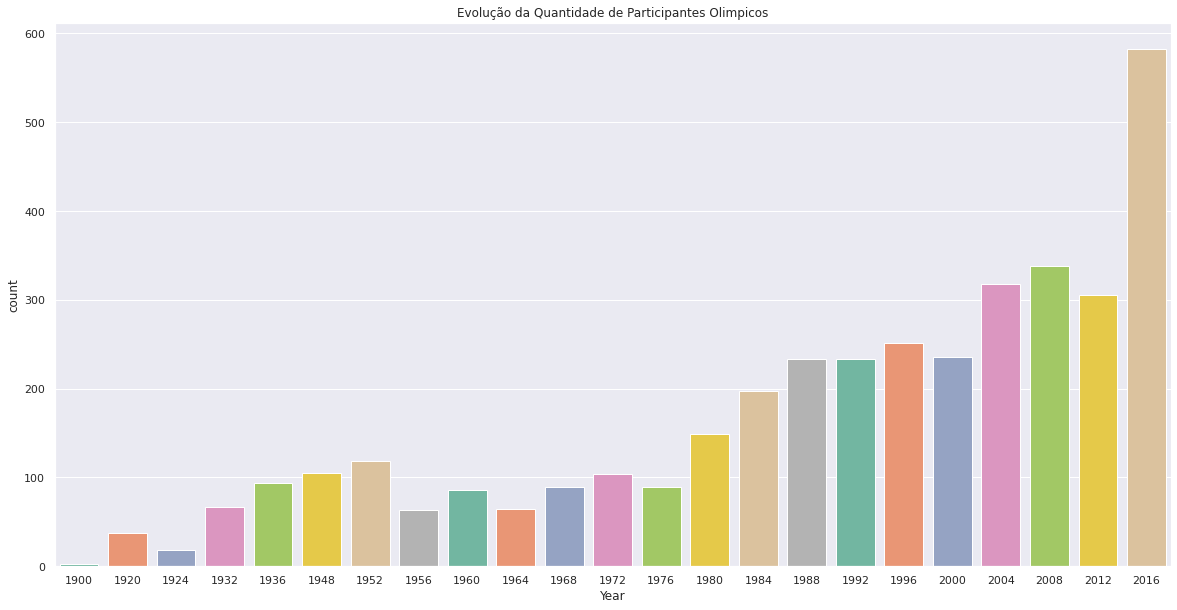

In [109]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=brasilOlimpico, palette='Set2')
plt.title('Evolução da Quantidade de Participantes Olimpicos')

As três edições com maiores participações de atletas brasileiros foram no anos de:

In [110]:
brasilOlimpico.Year.value_counts().reset_index(name='Medalhas').head(3)

,index,Medalhas
0,2016,583
1,2008,338
2,2004,318


* Vale ressaltar que um atleta pode participar de mais de um evento por olímpiada.

###8.1.1. Atletas Olímpicos Brasileiros - Masculino



Vamos plotar um gráfico de linhas para avaliar a variação de atletas brasileiros masculinos olímpicos ao longo do tempo.

Text(0.5, 1.0, 'Variação de Atletas Masculinos Olímpicos ao Longo do Tempo')

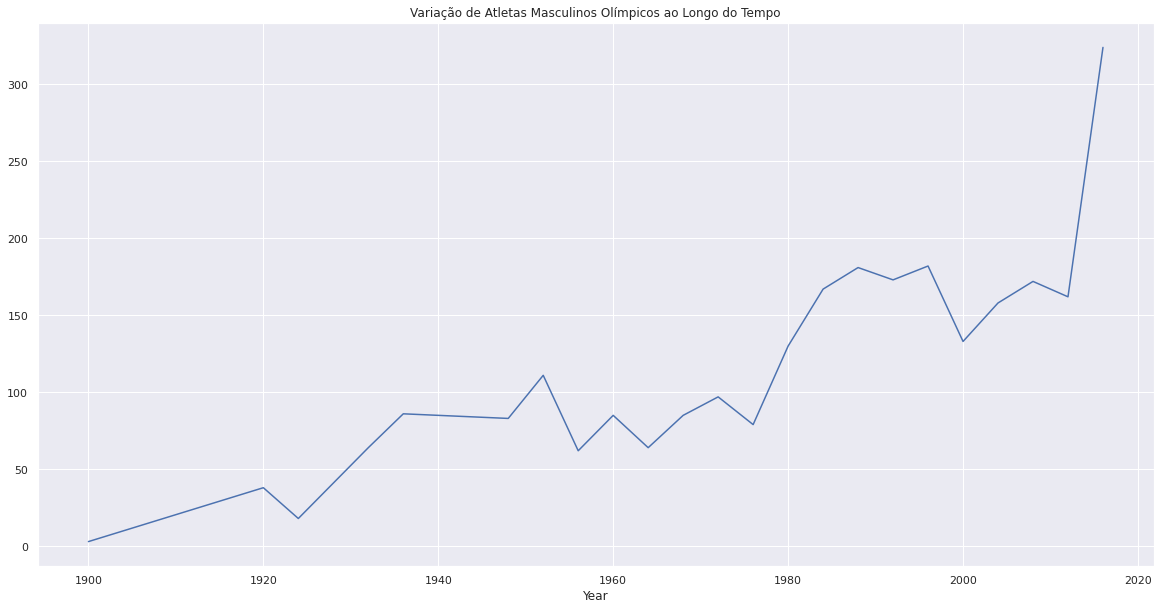

In [111]:
part = brasilOlimpico.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variação de Atletas Masculinos Olímpicos ao Longo do Tempo')

O crescimento da participação masculina nos jogos olímpicos é constante mas não tão intensa quanto ao crescimento do gênero feminino.
<br>
<br>
Nos jogos de Sydney observa-se uma diminuição relevante no número de participantes masculinos nos jogos de verão;
<br>
<br>
O crescimento recomeçou lentamente nos jogos de Atenas com um salto absurdo na Rio(2016).

###8.1.2. Atletas Olímpicos Brasileiros - Feminino

Vamos plotar um gráfico de linhas para avaliar a variação de atletas brasileiros femininos olímpicos ao longo do tempo.

Text(0.5, 1.0, 'Variação de Atletas Femininos Olímpicos ao Longo do Tempo')

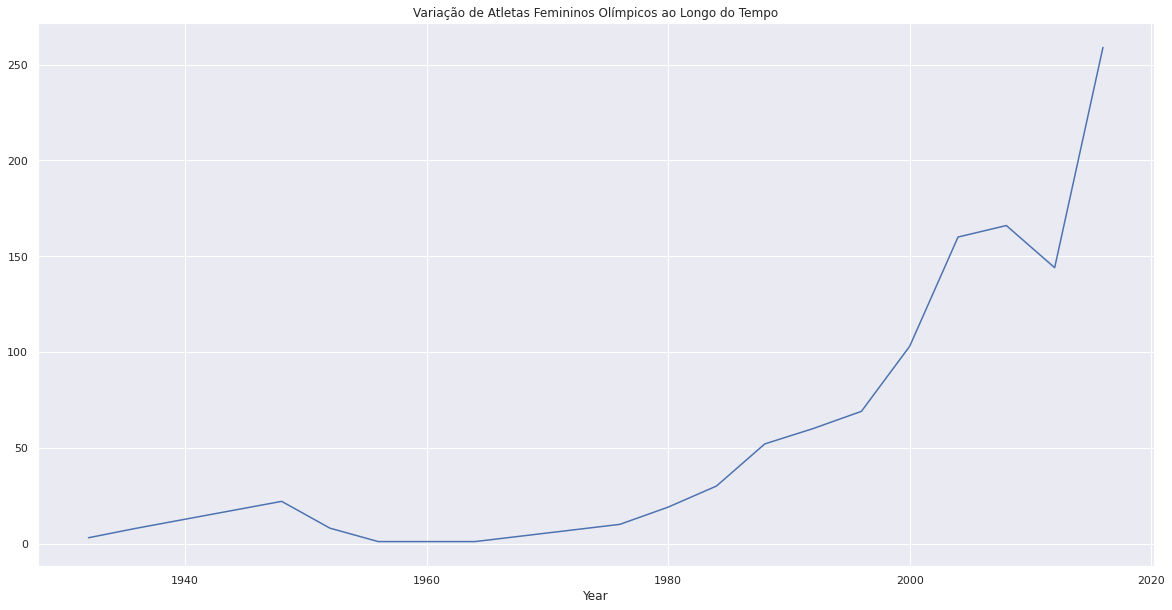

In [112]:
part = brasilOlimpico.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variação de Atletas Femininos Olímpicos ao Longo do Tempo')

Temos um aumento acentuado da participação feminina em jogos;
<br>
<br>
O crescimento é constante.

##*8.2. Atletas Campeões Olímpicos Brasileiros*

Vamos filtrar os atletas brasileiros que obtiveram medalhas de ouro.

In [113]:
brasilOuro = brasilOlimpico[(brasilOlimpico.Medal == 'Gold')]

Vamos verificar a distribuição dos atletas medalhistas de ouro ao longo das edições.

Text(0.5, 1.0, 'Brasileiros Campeões Olimpicos ao Longo dos Anos')

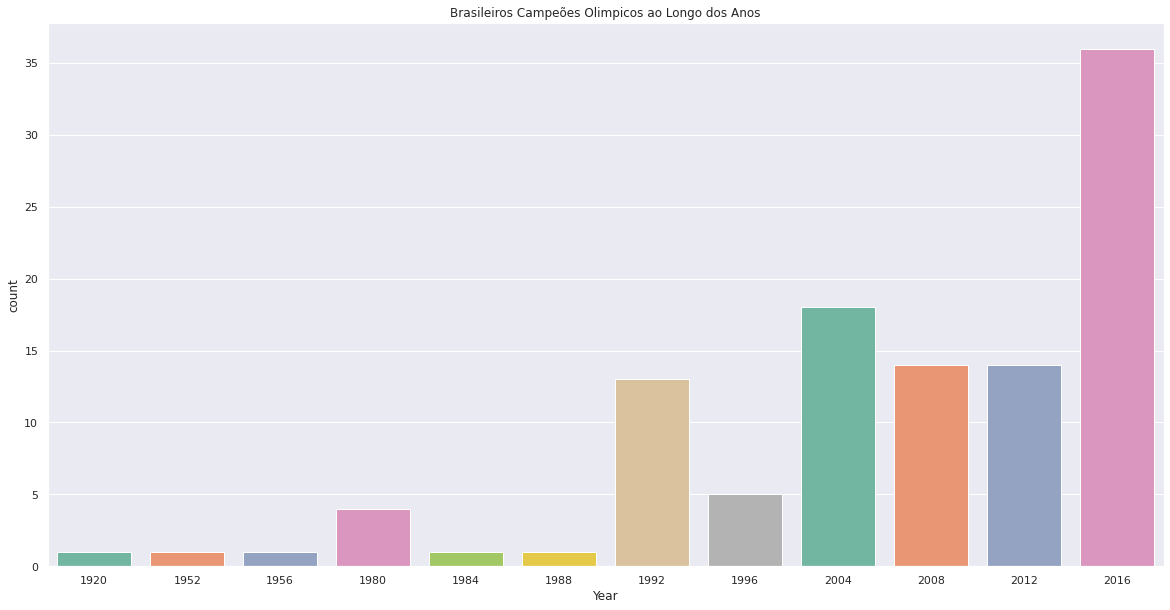

In [114]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=brasilOuro, palette='Set2')
plt.title('Brasileiros Campeões Olimpicos ao Longo dos Anos')

Vamos verificar as modalidades esportivas que proporcioaram medalhas de ouro ao Brasil.

In [115]:
esportesOuro= brasilOuro['Event'].unique().tolist()

In [116]:
esportesOuro

["Volleyball Women's Volleyball",
 "Beach Volleyball Men's Beach Volleyball",
 "Volleyball Men's Volleyball",
 'Sailing Mixed Multihull',
 "Athletics Men's Pole Vault",
 "Judo Men's Half-Lightweight",
 "Swimming Men's 50 metres Freestyle",
 "Boxing Men's Lightweight",
 "Athletics Men's 800 metres",
 "Athletics Men's Triple Jump",
 "Football Men's Football",
 'Sailing Mixed Two Person Keelboat',
 "Sailing Men's Two Person Keelboat",
 "Sailing Women's Skiff",
 "Athletics Women's Long Jump",
 "Judo Women's Extra-Lightweight",
 "Judo Men's Half-Heavyweight",
 "Shooting Men's Military Pistol, 30 metres",
 'Sailing Mixed Two Person Dinghy',
 'Equestrianism Mixed Jumping, Individual',
 "Beach Volleyball Women's Beach Volleyball",
 'Sailing Mixed One Person Dinghy',
 "Judo Women's Lightweight",
 "Gymnastics Men's Rings"]

Identificando as cinco principais modalidades esportivas que mais distribuiram medalhas aos atletas brasileiros.

In [117]:
brasilOuro.Event.value_counts().reset_index(name='Medal').head(5)


,index,Medal
0,Volleyball Men's Volleyball,36
1,Volleyball Women's Volleyball,24
2,Football Men's Football,17
3,Beach Volleyball Men's Beach Volleyball,4
4,Sailing Mixed One Person Dinghy,2


Atletas olimpicos brasileiros com mais medalhas de ouro.

In [118]:
brasilOuro.Name.value_counts().reset_index(name='Medal').head(20)


,index,Medal
0,Marcelo Bastos Ferreira,2
1,Thasa Daher de Menezes,2
2,Robert Scheidt,2
3,Giovane Farinazzo Gvio,2
4,Sheilla Tavares de Castro Blassioli,2
5,Fabiana Marcelino Claudino,2
6,"Fabiana ""Fabi"" Alvim de Oliveira",2
7,"Srgio ""Escadinha"" Dutra dos Santos",2
8,Torben Schmidt Grael,2
9,Adhemar Ferreira da Silva,2
